In [1]:
import os
tumor_classes = os.listdir('dataset')

In [2]:
tumor_classes

['Granuloma T2',
 'Astrocitoma T2',
 'Meningioma T2',
 'Meduloblastoma T1C+',
 'Carcinoma T1C+',
 'Neurocitoma T2',
 'Granuloma T1C+',
 'Papiloma T2',
 'Tuberculoma T2',
 'Tuberculoma T1C+',
 'Carcinoma T2',
 'Glioblastoma T1',
 'Schwannoma T2',
 '_NORMAL T1',
 'Glioblastoma T1C+',
 'Ependimoma T2',
 'Ganglioglioma T2',
 'Meduloblastoma T2',
 'Germinoma T1',
 'Oligodendroglioma T2',
 'Meningioma T1',
 'Astrocitoma T1',
 'Papiloma T1C+',
 'Granuloma T1',
 'Germinoma T1C+',
 'Oligodendroglioma T1C+',
 'Papiloma T1',
 'Tuberculoma T1',
 'Schwannoma T1C+',
 'Neurocitoma T1',
 'Carcinoma T1',
 'Ganglioglioma T1C+',
 'Schwannoma T1',
 '_NORMAL T2',
 'Glioblastoma T2',
 'tumor_classifier.h5',
 'Meduloblastoma T1',
 'Ependimoma T1C+',
 'Ependimoma T1',
 'Ganglioglioma T1',
 'Astrocitoma T1C+',
 'Germinoma T2',
 'Neurocitoma T1C+',
 'Oligodendroglioma T1',
 'Meningioma T1C+']

In [3]:
tumor_classes_dict = {i+1: value for i, value in enumerate(tumor_classes)}
tumor_classes_dict

{1: 'Granuloma T2',
 2: 'Astrocitoma T2',
 3: 'Meningioma T2',
 4: 'Meduloblastoma T1C+',
 5: 'Carcinoma T1C+',
 6: 'Neurocitoma T2',
 7: 'Granuloma T1C+',
 8: 'Papiloma T2',
 9: 'Tuberculoma T2',
 10: 'Tuberculoma T1C+',
 11: 'Carcinoma T2',
 12: 'Glioblastoma T1',
 13: 'Schwannoma T2',
 14: '_NORMAL T1',
 15: 'Glioblastoma T1C+',
 16: 'Ependimoma T2',
 17: 'Ganglioglioma T2',
 18: 'Meduloblastoma T2',
 19: 'Germinoma T1',
 20: 'Oligodendroglioma T2',
 21: 'Meningioma T1',
 22: 'Astrocitoma T1',
 23: 'Papiloma T1C+',
 24: 'Granuloma T1',
 25: 'Germinoma T1C+',
 26: 'Oligodendroglioma T1C+',
 27: 'Papiloma T1',
 28: 'Tuberculoma T1',
 29: 'Schwannoma T1C+',
 30: 'Neurocitoma T1',
 31: 'Carcinoma T1',
 32: 'Ganglioglioma T1C+',
 33: 'Schwannoma T1',
 34: '_NORMAL T2',
 35: 'Glioblastoma T2',
 36: 'tumor_classifier.h5',
 37: 'Meduloblastoma T1',
 38: 'Ependimoma T1C+',
 39: 'Ependimoma T1',
 40: 'Ganglioglioma T1',
 41: 'Astrocitoma T1C+',
 42: 'Germinoma T2',
 43: 'Neurocitoma T1C+',
 4

In [4]:
import json
with open('tumor_classes', 'w') as json_file:
    json.dump(tumor_classes_dict, json_file)

In [5]:
# !pip install tensorflow

In [6]:
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [7]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [8]:
tf.config.list_physical_devices('GPU')

[]

In [9]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import cv2

In [10]:
data_path = os.path.join(os.getcwd(), 'dataset')
data_path

'/Users/pranav/AIML/AI/CV/BrainTumorUpdated/dataset'

In [11]:
data = tf.keras.utils.image_dataset_from_directory(data_path,
                                                   labels='inferred',
                                                   label_mode='categorical',
                                                   image_size=(224, 224),
                                                   color_mode='grayscale',
                                                   shuffle=True,
                                                   seed=42)

Found 4478 files belonging to 44 classes.


In [12]:
data_iterator = data.as_numpy_iterator()

In [13]:
batch = data_iterator.next()

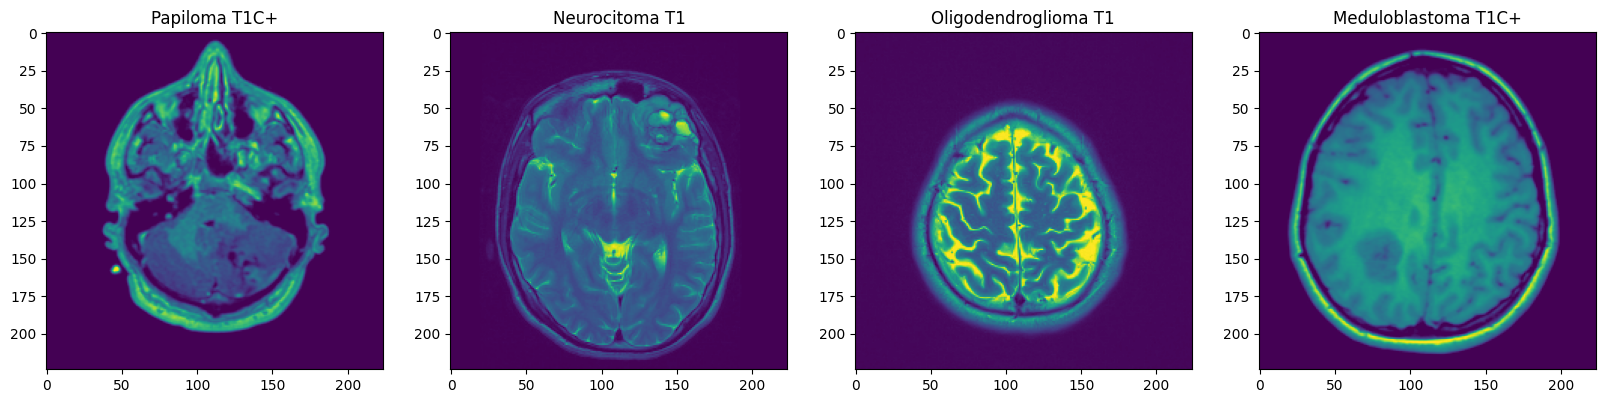

In [14]:
from ast import Str
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text([tumor_classes[i] for i in range(len(batch[1][idx])) if batch[1][idx][i] == 1][0]) 

In [15]:
data = data.map(lambda x,y : (x/255, y))

In [16]:
data = data.map(lambda x,y : (tf.repeat(x, 3, axis=-1), y))

In [17]:
data.as_numpy_iterator().next()

(array([[[[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

In [18]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [19]:
train_size

98

In [20]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [26]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(44, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
hist = model.fit(train, epochs=30, validation_data=val)

Epoch 1/30
98/98 [==============================] - 27s 267ms/step - loss: 2.2774 - accuracy: 0.4149 - val_loss: 1.6566 - val_accuracy: 0.5525
Epoch 2/30
98/98 [==============================] - 28s 280ms/step - loss: 1.2172 - accuracy: 0.6709 - val_loss: 1.1673 - val_accuracy: 0.6674
Epoch 3/30
98/98 [==============================] - 27s 276ms/step - loss: 0.8305 - accuracy: 0.7688 - val_loss: 0.9716 - val_accuracy: 0.7243
Epoch 4/30
98/98 [==============================] - 27s 275ms/step - loss: 0.5796 - accuracy: 0.8460 - val_loss: 0.9194 - val_accuracy: 0.7455
Epoch 5/30
98/98 [==============================] - 28s 282ms/step - loss: 0.4225 - accuracy: 0.8881 - val_loss: 0.7617 - val_accuracy: 0.8036
Epoch 6/30
98/98 [==============================] - 26s 269ms/step - loss: 0.3193 - accuracy: 0.9273 - val_loss: 0.7079 - val_accuracy: 0.8103
Epoch 7/30
98/98 [==============================] - 26s 269ms/step - loss: 0.2243 - accuracy: 0.9614 - val_loss: 0.6149 - val_accuracy: 0.8382

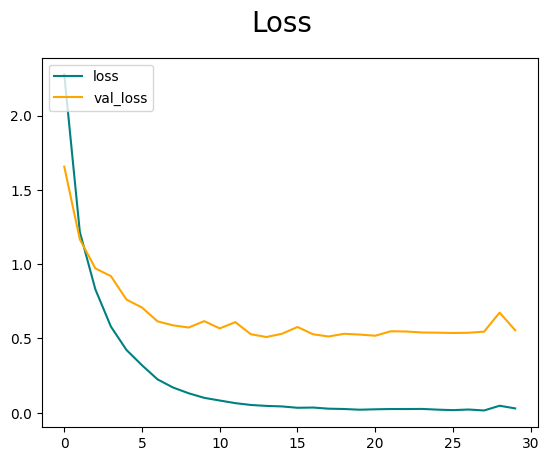

In [28]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

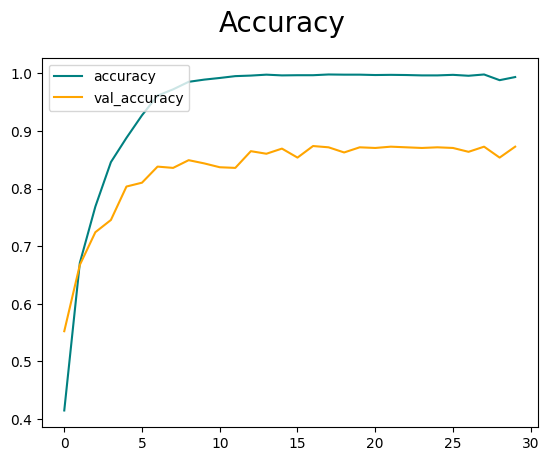

In [29]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [38]:
model.save(os.path.join(data_path,'tumor_classifier.h5'))

In [31]:
ytest = []
ypred = []
for batch in test.as_numpy_iterator():
    X, y = batch
    ytest.append(y)
    yhat = model.predict(X)
    ypred.append(yhat)     

1/1 [==============================] - 0s 443ms/step


In [32]:
ytest

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        ...,
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 0.],


In [33]:
ypred

[array([[9.8926589e-11, 1.5360918e-05, 1.8994015e-09, ..., 1.6699689e-11,
         1.0503039e-10, 1.2139785e-13],
        [4.1031367e-03, 3.4016324e-05, 1.6928027e-06, ..., 4.9499596e-07,
         4.3645051e-07, 1.1335171e-12],
        [7.2447158e-08, 1.2909370e-06, 3.5699641e-03, ..., 4.2371634e-05,
         1.8033566e-07, 2.6118103e-03],
        ...,
        [1.7959148e-11, 7.1893036e-10, 7.2022152e-11, ..., 6.4705111e-14,
         4.5044114e-14, 3.9471875e-15],
        [7.6167703e-09, 6.0431665e-07, 5.2331445e-10, ..., 2.9515740e-10,
         1.5513082e-10, 4.6807440e-14],
        [8.5594847e-09, 6.8085368e-09, 1.4882527e-07, ..., 1.9518955e-09,
         6.9215232e-05, 9.9991930e-01]], dtype=float32),
 array([[1.1076933e-03, 1.1127224e-06, 3.5324403e-11, ..., 3.8921897e-11,
         8.5900833e-09, 7.6136830e-14],
        [9.4515737e-09, 7.8788679e-04, 6.1957142e-04, ..., 3.0297724e-06,
         4.4268318e-09, 8.6899126e-01],
        [4.9965536e-07, 1.9997017e-02, 3.7007410e-08, ...,

In [34]:
predicted_class_indices = np.argmax(ypred[0], axis=1)

In [35]:
true_class_indices = np.argmax(ytest[0], axis=1)

In [36]:
true_class_indices

array([25, 27, 23,  7, 25, 26,  1, 17, 42, 25,  0, 30, 41, 36, 15, 25,  2,
       24, 34, 42,  1,  5, 38, 28,  0, 24, 43, 23, 37, 28, 27, 43])

In [37]:
for i in range(len(true_class_indices)):
  print(f'predicted : {tumor_classes[predicted_class_indices[i]]} - {tumor_classes[true_class_indices[i]]} : Actual ')
    

predicted : Oligodendroglioma T1C+ - Oligodendroglioma T1C+ : Actual 
predicted : Tuberculoma T1 - Tuberculoma T1 : Actual 
predicted : Granuloma T1 - Granuloma T1 : Actual 
predicted : Papiloma T2 - Papiloma T2 : Actual 
predicted : Oligodendroglioma T1C+ - Oligodendroglioma T1C+ : Actual 
predicted : Ependimoma T1 - Papiloma T1 : Actual 
predicted : Astrocitoma T2 - Astrocitoma T2 : Actual 
predicted : Meduloblastoma T2 - Meduloblastoma T2 : Actual 
predicted : Neurocitoma T1C+ - Neurocitoma T1C+ : Actual 
predicted : Oligodendroglioma T1C+ - Oligodendroglioma T1C+ : Actual 
predicted : Granuloma T2 - Granuloma T2 : Actual 
predicted : Carcinoma T1 - Carcinoma T1 : Actual 
predicted : Germinoma T2 - Germinoma T2 : Actual 
predicted : Ependimoma T1C+ - Meduloblastoma T1 : Actual 
predicted : Oligodendroglioma T1C+ - Ependimoma T2 : Actual 
predicted : Oligodendroglioma T1C+ - Oligodendroglioma T1C+ : Actual 
predicted : Meningioma T2 - Meningioma T2 : Actual 
predicted : Germinoma T1C